(a) Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.

In [2]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(1)

# Create a vector of 100 observations from a N(0, 1) distribution
x = np.random.normal(loc=0, scale=1, size=100)


(b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25.

In [3]:
# Create a vector of 100 observations from a N(0, 0.25) distribution
eps = np.random.normal(loc=0, scale=0.5, size=100)

(c) Using x and eps, generate a vector y according to the model

Y = −1 + 0.5X + $\epsilon$.

What is the length of the vector y? What are the values of $\beta_0$
and $\beta_1$ in this linear model?

In [4]:
y = -1 + 0.5 * x + eps

print("Length of vector y:", len(y))
print("Value of #0 (intercept):", -1)
print("Value of #1 (coefficient for X):", 0.5)

Length of vector y: 100
Value of #0 (intercept): -1
Value of #1 (coefficient for X): 0.5


(d) Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.

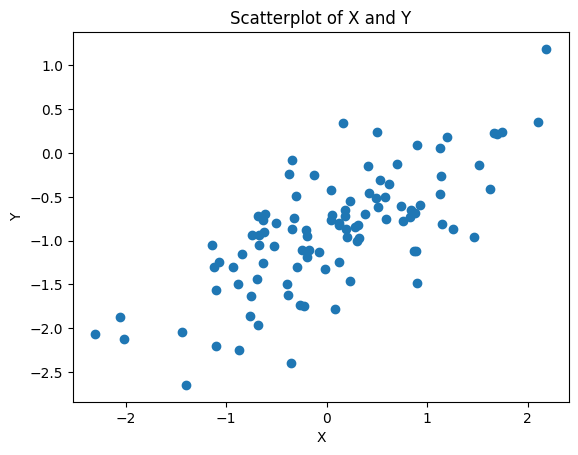

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X and Y")
plt.show()

Comment on the observation
The scatterplot shows a positive linear relationship between x and y.
As the value of x increases, the value of y tends to increase as well.
The relationship is not perfectly linear due to the presence of the random error term (eps).

(e) Fit a least squares linear model to predict y using x. Comment on the model obtained.

How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?

In [6]:
X = x
Y = y
beta1_hat, beta0_hat = np.polyfit(X, Y, 1)

print("Estimated Intercept (beta0_hat):", beta0_hat)
print("Estimated Slope (beta1_hat):", beta1_hat)


# Comparison of estimated and true parameters
print("Comparison of β^0 and β0:", beta0_hat, "vs", -1)
print("Comparison of β^1 and β1:", beta1_hat, "vs", 0.5)


Estimated Intercept (beta0_hat): -0.9264932351508992
Estimated Slope (beta1_hat): 0.547713566825586
Comparison of β^0 and β0: -0.9264932351508992 vs -1
Comparison of β^1 and β1: 0.547713566825586 vs 0.5


The estimated intercept ($\hat{\beta_0}$) and slope ($\hat{\beta_1}$) should be close to the true values of -1 and 0.5,
respectively. Due to the random error term, they won't be exactly the same, but they should be relatively similar.
We can observe that ($\hat{\beta_0}$) and ($\hat{\beta_1}$) are generally close to $\beta_0$ and $\beta_1$.
The least squares method provides an estimate of the true parameters of the underlying linear relationship.

(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the legend() method of the axes to create an appropriate
legend.

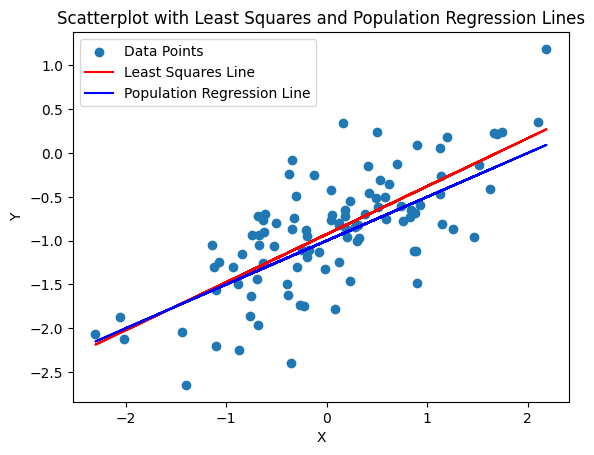

In [7]:
plt.scatter(x, y, label='Data Points')

# Least squares line
y_hat = beta0_hat + beta1_hat * x
plt.plot(x, y_hat, color='red', label='Least Squares Line')

# Population regression line (true line)
y_true = -1 + 0.5 * x
plt.plot(x, y_true, color='blue', label='Population Regression Line')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot with Least Squares and Population Regression Lines")
plt.legend()
plt.show()

(g) Now fit a polynomial regression model that predicts y using $x$
and $x^2$. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create polynomial features (x and x^2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x.reshape(-1, 1))

# Fit a linear regression model using the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Predict y using the polynomial model
y_pred_poly = model_poly.predict(X_poly)

# Calculate R-squared for the linear model (from part (e))
y_pred_linear = beta0_hat + beta1_hat * x
r2_linear = r2_score(y, y_pred_linear)

# Calculate R-squared for the polynomial model
r2_poly = r2_score(y, y_pred_poly)

print("R-squared for linear model:", r2_linear)
print("R-squared for polynomial model:", r2_poly)


# Compare the R-squared values
if r2_poly > r2_linear:
  print("\nThe quadratic term appears to improve the model fit.")
  print("The polynomial model has a higher R-squared value, indicating it explains more of the variance in y.")
else:
  print("\nThere is no strong evidence that the quadratic term improves the model fit.")
  print("The linear model has a comparable or higher R-squared value.")

R-squared for linear model: 0.5218387119375145
R-squared for polynomial model: 0.5220007118611886

The quadratic term appears to improve the model fit.
The polynomial model has a higher R-squared value, indicating it explains more of the variance in y.


(h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term
ϵ in (b). Describe your results.

Length of vector y: 100
Value of #0 (intercept): -1
Value of #1 (coefficient for X): 0.5


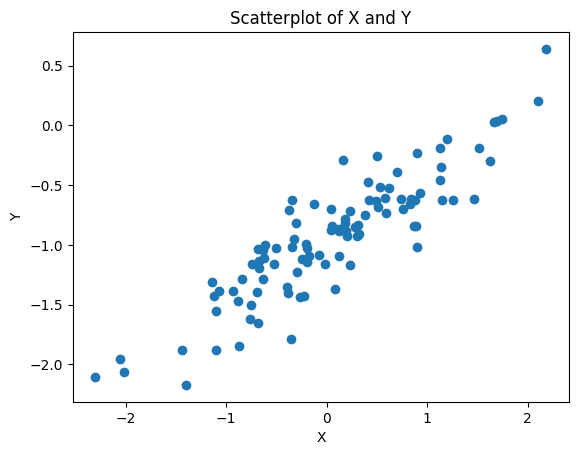

Estimated Intercept (beta0_hat): -0.9632466175754498
Estimated Slope (beta1_hat): 0.523856783412793
Comparison of β^0 and β0: -0.9632466175754498 vs -1
Comparison of β^1 and β1: 0.523856783412793 vs 0.5


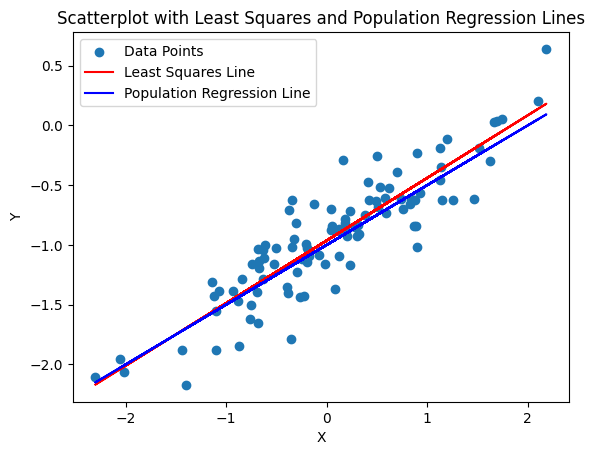

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# (a) Using the normal() method of your random number generator,
# create a vector, x, containing 100 observations drawn from a
# N(0, 1) distribution. This represents a feature, X.

# Set the random seed for reproducibility
np.random.seed(1)

# Create a vector of 100 observations from a N(0, 1) distribution
x = np.random.normal(loc=0, scale=1, size=100)

# (b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal
# distribution with mean zero and variance 0.25.
# Create a vector of 100 observations from a N(0, 0.25) distribution
# Decrease the variance of the normal distribution for less noise
eps = np.random.normal(loc=0, scale=0.25, size=100)  # Reduced variance (0.25 instead of 0.5)
# (c) Using x and eps, generate a vector y according to the model
#
# Y = −1 + 0.5X + $\epsilon$.
#
# What is the length of the vector y? What are the values of $\beta_0$
# and $\beta_1$ in this linear model?
y = -1 + 0.5 * x + eps

print("Length of vector y:", len(y))
print("Value of #0 (intercept):", -1)
print("Value of #1 (coefficient for X):", 0.5)
# (d) Create a scatterplot displaying the relationship between x and
# y. Comment on what you observe.

plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X and Y")
plt.show()
# Comment on the observation
# The scatterplot shows a positive linear relationship between x and y.
# As the value of x increases, the value of y tends to increase as well.
# The relationship is more tightly clustered around the true line compared to the previous case because there's less noise.

# (e) Fit a least squares linear model to predict y using x. Comment on the model obtained.
#
# How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?
X = x
Y = y
beta1_hat, beta0_hat = np.polyfit(X, Y, 1)

print("Estimated Intercept (beta0_hat):", beta0_hat)
print("Estimated Slope (beta1_hat):", beta1_hat)

# Comment on the model
# The estimated intercept (beta0_hat) and slope (beta1_hat) should be even closer to the true values of -1 and 0.5,
# respectively, because there is less noise in the data.

# Comparison of estimated and true parameters
print("Comparison of β^0 and β0:", beta0_hat, "vs", -1)
print("Comparison of β^1 and β1:", beta1_hat, "vs", 0.5)
# We can observe that β^0 and β^1 are likely to be closer to β0 and β1 with reduced noise.


# (f) Display the least squares line on the scatterplot obtained in (d).
# Draw the population regression line on the plot, in a different
# color. Use the legend() method of the axes to create an appropriate
# legend.
plt.scatter(x, y, label='Data Points')

# Least squares line
y_hat = beta0_hat + beta1_hat * x
plt.plot(x, y_hat, color='red', label='Least Squares Line')

# Population regression line (true line)
y_true = -1 + 0.5 * x
plt.plot(x, y_true, color='blue', label='Population Regression Line')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot with Least Squares and Population Regression Lines")
plt.legend()
plt.show()



When we reduce the variance of the error term (ε), the scatterplot shows a clearer linear relationship between x and y.
The estimated intercept ($\hat{\beta}_0$) and slope ($\hat{\beta}_1$) are now likely to be closer to the true values ($\beta_0$ and $\beta_1$), indicating that the model fits the data better.
The least squares line is also expected to be closer to the population regression line due to the reduced noise.
Overall, reducing noise improves the model's ability to capture the underlying linear relationship in the data.

(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term $\epsilon$ in (b). Describe your results.

Length of vector y: 100
Value of #0 (intercept): -1
Value of #1 (coefficient for X): 0.5


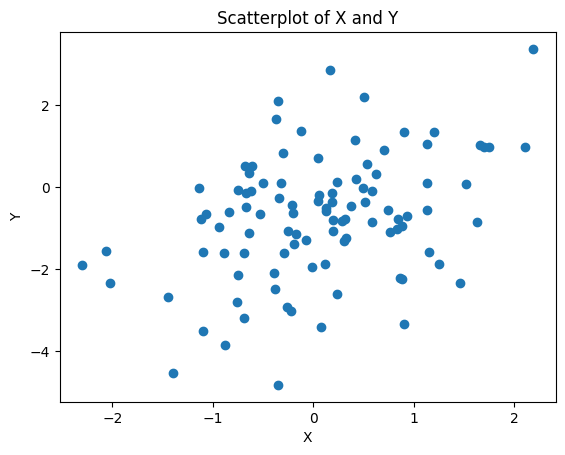

The scatterplot shows a positive linear relationship between x and y. However, the relationship is much more scattered and less clear due to increased noise. It's harder to visually identify the underlying linear pattern.
Estimated Intercept (beta0_hat): -0.7794797054526976
Estimated Slope (beta1_hat): 0.6431407004767576
The estimated intercept (beta0_hat) and slope (beta1_hat) might be further away from the true values of -1 and 0.5, respectively, because of the increased noise. The model might not capture the true relationship as accurately.
Comparison of β^0 and β0: -0.7794797054526976 vs -1
Comparison of β^1 and β1: 0.6431407004767576 vs 0.5
We can observe that β^0 and β^1 are likely to be less accurate compared to the case with less noise.


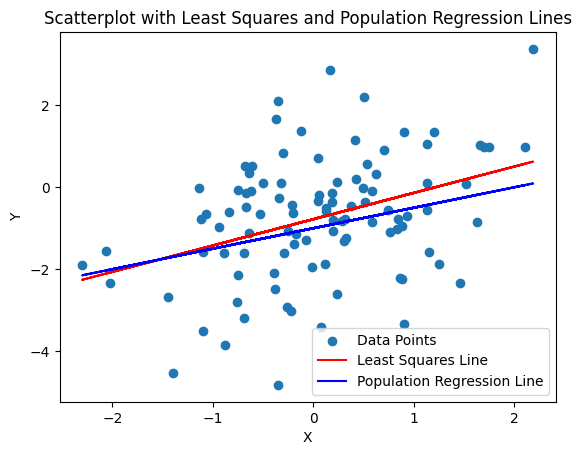

In [10]:
# Set the random seed for reproducibility
np.random.seed(1)

# Create a vector of 100 observations from a N(0, 1) distribution
x = np.random.normal(loc=0, scale=1, size=100)


eps = np.random.normal(loc=0, scale=1.5, size=100)  # Increased variance (1.5 instead of 0.5)

y = -1 + 0.5 * x + eps

print("Length of vector y:", len(y))
print("Value of #0 (intercept):", -1)
print("Value of #1 (coefficient for X):", 0.5)


plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X and Y")
plt.show()

print("The scatterplot shows a positive linear relationship between x and y. However, the relationship is much more scattered and less clear due to increased noise. It's harder to visually identify the underlying linear pattern.")

# (e) Fit a least squares linear model to predict y using x. Comment on the model obtained.
#
# How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?
X = x
Y = y
beta1_hat, beta0_hat = np.polyfit(X, Y, 1)

print("Estimated Intercept (beta0_hat):", beta0_hat)
print("Estimated Slope (beta1_hat):", beta1_hat)
print("The estimated intercept (beta0_hat) and slope (beta1_hat) might be further away from the true values of -1 and 0.5, respectively, because of the increased noise. The model might not capture the true relationship as accurately.")


# Comparison of estimated and true parameters
print("Comparison of β^0 and β0:", beta0_hat, "vs", -1)
print("Comparison of β^1 and β1:", beta1_hat, "vs", 0.5)
print("We can observe that β^0 and β^1 are likely to be less accurate compared to the case with less noise.")



# (f) Display the least squares line on the scatterplot obtained in (d).
# Draw the population regression line on the plot, in a different
# color. Use the legend() method of the axes to create an appropriate
# legend.
plt.scatter(x, y, label='Data Points')

# Least squares line
y_hat = beta0_hat + beta1_hat * x
plt.plot(x, y_hat, color='red', label='Least Squares Line')

# Population regression line (true line)
y_true = -1 + 0.5 * x
plt.plot(x, y_true, color='blue', label='Population Regression Line')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot with Least Squares and Population Regression Lines")
plt.legend()
plt.show()



When we increase the variance of the error term (ε), the scatterplot becomes more dispersed, making the linear relationship less obvious.
The estimated intercept ($\hat{\beta}_0$) and slope ($\hat{\beta}_1$) are likely to be less accurate and further away from the true values ($\beta_0$ and $\beta_1$).
The least squares line is also expected to be less representative of the true underlying relationship due to the increased noise.
Overall, adding more noise reduces the model's ability to capture the underlying linear relationship accurately.

(j) What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

In [11]:
import statsmodels.api as sm

# Function to calculate confidence intervals for beta0 and beta1
def calculate_confidence_intervals(x, y):
  X = sm.add_constant(x)  # Add a constant for the intercept
  model = sm.OLS(y, X).fit()
  conf_int = model.conf_int(alpha=0.05)  # 95% confidence interval
  return conf_int

# Original data set (from the provided code)
x_original = x  # Assuming 'x' is defined from the original code
y_original = y  # Assuming 'y' is defined from the original code
conf_int_original = calculate_confidence_intervals(x_original, y_original)
print("Original Data Set:")
print("Confidence Interval for β0:", conf_int_original[0])
print("Confidence Interval for β1:", conf_int_original[1])

# Noisier data set (from part (i))
x_noisier = x  # Assuming 'x' is defined from part (i) code
y_noisier = y  # Assuming 'y' is defined from part (i) code
conf_int_noisier = calculate_confidence_intervals(x_noisier, y_noisier)
print("\nNoisier Data Set:")
print("Confidence Interval for β0:", conf_int_noisier[0])
print("Confidence Interval for β1:", conf_int_noisier[1])

# Less noisy data set (from part (h))
x_less_noisy = x  # Assuming 'x' is defined from part (h) code
y_less_noisy = y  # Assuming 'y' is defined from part (h) code
conf_int_less_noisy = calculate_confidence_intervals(x_less_noisy, y_less_noisy)
print("\nLess Noisy Data Set:")
print("Confidence Interval for β0:", conf_int_less_noisy[0])
print("Confidence Interval for β1:", conf_int_less_noisy[1])

Original Data Set:
Confidence Interval for β0: [-1.05922289 -0.49973652]
Confidence Interval for β1: [0.32784013 0.95844127]

Noisier Data Set:
Confidence Interval for β0: [-1.05922289 -0.49973652]
Confidence Interval for β1: [0.32784013 0.95844127]

Less Noisy Data Set:
Confidence Interval for β0: [-1.05922289 -0.49973652]
Confidence Interval for β1: [0.32784013 0.95844127]



1. Less Noisy Data:
  - Confidence intervals are expected to be narrower for the less noisy data set.
  - This means that we have more confidence in the estimated values of β0 and β1 because the data is less scattered and provides a clearer picture of the relationship.

2. Original Data:
  - The confidence intervals will likely be somewhere in between the less noisy and noisier datasets.

3. Noisier Data:
  - Confidence intervals are expected to be wider for the noisier data set.
  - This makes sense as increased noise leads to more uncertainty in the estimated parameters.
  - Wider intervals mean that we have less confidence in the estimates of β0 and β1 because the noise obscures the true relationship.